# Preprocessing Incıdent Data

In [1]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data and review content
symptom_data = pd.read_csv("root_cause_analysis.csv")


#print("\nLoaded Data : n\------------------------")
print(symptom_data.head())

   ID  CPU_LOAD  MEMORY_LEAK_LOAD  DELAY  ERROR_1000  ERROR_1001  ERROR_1002  \
0   1         0                 0      0           0           1           0   
1   2         0                 0      0           0           0           0   
2   3         0                 1      1           0           0           1   
3   4         0                 1      0           1           1           0   
4   5         1                 1      0           1           0           1   

   ERROR_1003     ROOT_CAUSE  
0           1    MEMORY_LEAK  
1           1    MEMORY_LEAK  
2           1    MEMORY_LEAK  
3           1    MEMORY_LEAK  
4           0  NETWORK_DELAY  


In [2]:
#Use a Label encoder to convert String to numeric  values
# for the Target variable

from sklearn import preprocessing    # used to make LabelEncoder
label_encode = preprocessing.LabelEncoder()

symptom_data['ROOT_CAUSE'] = label_encode.fit_transform(symptom_data["ROOT_CAUSE"])
 # yukarıdkai kod iris_data veri setindeki "Species" sütununu "LabelEncoder" kullanarak sayılsal değerlere dönüştürür.
 # örneğin Species sütununda versicolor, virginica ve setosa gibi veriler var 
 # bu verilere setosa için 0, versicolor için 1 ve virginica için 2 değerlerini atayabilir.

In [3]:
symptom_data.head()

,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,1
1,2,0,0,0,0,0,0,1,1
2,3,0,1,1,0,0,1,1,1
3,4,0,1,0,1,1,0,1,1
4,5,1,1,0,1,0,1,0,2


In [4]:
symptom_data.tail()

,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
995,996,0,0,0,0,0,0,1,0
996,997,0,0,0,1,0,0,0,2
997,998,1,1,1,0,0,0,0,1
998,999,0,1,1,1,1,0,0,2
999,1000,1,0,0,0,1,1,0,0


In [5]:
# Convert input to numpy array
np_symptom=symptom_data.to_numpy()  # pandas olan "symptom_data" setini numpy dizisine çevirir ve "np_iris" içine atar

In [6]:
np_symptom

array([[   1,    0,    0, ...,    0,    1,    1],
       [   2,    0,    0, ...,    0,    1,    1],
       [   3,    0,    1, ...,    1,    1,    1],
       ...,
       [ 998,    1,    1, ...,    0,    0,    1],
       [ 999,    0,    1, ...,    0,    0,    2],
       [1000,    1,    0, ...,    1,    0,    0]], dtype=int64)

In [7]:
# Seperate input to numpy array
x_data = np_symptom[:,1:8] # x_data, np_iris dizisinin tüm satırlarını (:) ve ilk sekiz sütununu (0:8) seçer.
y_data = np_symptom[:,8]   # y_data, np_iris dizisinin tüm satırlarını (:) ve sekizinci sütununu (8) seçer.

In [8]:
#Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(x_data)

# Scale the numeric feature variables
x_data = scaler.transform(x_data)

In [9]:
unique_classes = np.unique(y_data)
num_classes = len(unique_classes)

print(f"Benzersiz sınıflar: {unique_classes}")
print(f"Sınıf sayısı: {num_classes}")

Benzersiz sınıflar: [0 1 2]
Sınıf sayısı: 3


In [10]:
#Convert target variable as a one-hot-encoding array
y_data = tf.keras.utils.to_categorical(y_data,3)

#yukarıda one-hot-encoding yapmamızın sebebi "y_data" da 0 ,1 ve 2 gibi veriler var
# bu veriler LabelEncoder ile 0,1,2 ye çevrilmişti şimdi one-hot encoding ile matrisledik

In [11]:
# Split training and test data
x_train, x_test, y_train, y_test = train_test_split ( x_data, y_data, test_size=0.10)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(900, 7) (900, 3) (100, 7) (100, 3)


# Creating a Model

In [12]:
from tensorflow import keras

In [13]:
# Number of classes in target variable
# there are 3 classes
NB_CLASSES = 3
N_HIDDEN=32

In [14]:
# Create a sequencial model in Keras
model = tf.keras.models.Sequential()

In [15]:
# Add the first hidden layer
model.add(keras.layers.Dense (N_HIDDEN,                            #Number of nodes
                              input_shape = (7,),            #Number of input variables, there are 4 "x_data" column
                              name = "Hidden-Layer-1",        #Logical name
                              activation = "relu"))           #activation function

In [16]:
# Add a second hidden layer
model.add(keras.layers.Dense(N_HIDDEN,
                             name = "Hidden-Layer-2",
                             activation="relu"))

In [17]:
# Add an Output layer with softmax activation ( softmax activation çok sınıflı sınıflandırmada kulanılır)
model.add(keras.layers.Dense(NB_CLASSES,
                             name = "Output-Layer",
                             activation = "softmax"))

In [18]:
# Compile the model with loss & metrics
model.compile(loss="categorical_crossentropy",
              metrics = ["accuracy"])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 32)                256       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 32)                1056      
                                                                 
 Output-Layer (Dense)        (None, 3)                 99        
                                                                 
Total params: 1411 (5.51 KB)
Trainable params: 1411 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 4. Training and Evaluating the Model

In [20]:
VERBOSE = 1

# Setup Hyper Parameters for training
BATCH_SIZE = 16
EPOCHS=10
VALIDATION_SPLIT=0.2 #önerilen %10 ancak verim az o yüzden %20 kullandım

In [21]:
print("\nEğitim İlerlemesi:\n------------------------------------")

# Fit the model. This will perform the entire training cycle, including
# forward propagation, loss computation, backward propagation and gradient descent.
# Execute for the specified batch size and epoch
# Perform validation after each epoch
history = model.fit(x_train,
                    y_train,
                    batch_size = BATCH_SIZE,
                    epochs= EPOCHS,
                    verbose = VERBOSE,
                    validation_split = VALIDATION_SPLIT)


Eğitim İlerlemesi:
------------------------------------
Epoch 1/10
45/45 [==============================] - 1s 5ms/step - loss: 0.8435 - accuracy: 0.7431 - val_loss: 0.7164 - val_accuracy: 0.8000
Epoch 2/10
45/45 [==============================] - 0s 1ms/step - loss: 0.5986 - accuracy: 0.8375 - val_loss: 0.5586 - val_accuracy: 0.8111
Epoch 3/10
45/45 [==============================] - 0s 1ms/step - loss: 0.4858 - accuracy: 0.8486 - val_loss: 0.5143 - val_accuracy: 0.8167
Epoch 4/10
45/45 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.8458 - val_loss: 0.4945 - val_accuracy: 0.8222
Epoch 5/10
45/45 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8611 - val_loss: 0.4813 - val_accuracy: 0.8167
Epoch 6/10
45/45 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8611 - val_loss: 0.4762 - val_accuracy: 0.8278
Epoch 7/10
45/45 [==============================] - 0s 1ms/step - loss: 0.4046 - accuracy: 0.8597 - val


Eğitim Sırasında Doğruluk :
------------------------------------


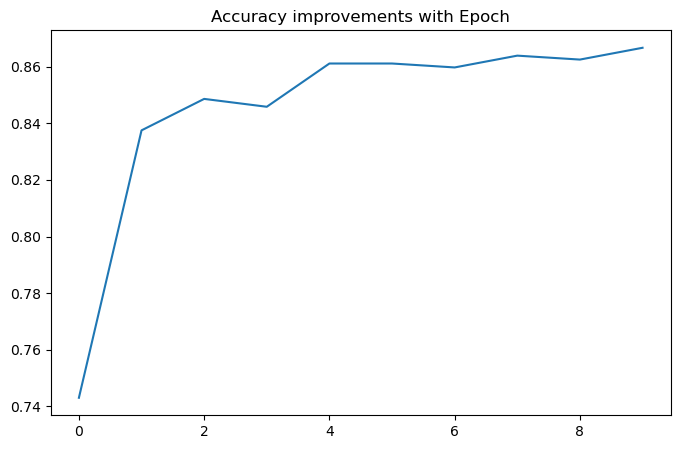


Test Veri Kümesine Karşı Değerlendirme :
------------------------------------
4/4 [==============================] - 0s 2ms/step - loss: 0.5606 - accuracy: 0.7500


[0.5606151819229126, 0.75]

In [22]:
print("\nEğitim Sırasında Doğruluk :\n------------------------------------")

import matplotlib.pyplot as plt

# plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8,5))
plt.title("Accuracy improvements with Epoch")
plt.show()

# Evaluate the model against the test dataset and print results
print("\nTest Veri Kümesine Karşı Değerlendirme :\n------------------------------------")
model.evaluate(x_test,y_test)

In [23]:
#Pass individual flags to Predict the root cause
import numpy as np

CPU_LOAD=1
MEMORY_LOAD=0
DELAY=0
ERROR_1000=0
ERROR_1001=1
ERROR_1002=1
ERROR_1003=0

prediction=np.argmax(model.predict(
    [[CPU_LOAD,MEMORY_LOAD,DELAY,
      ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003]]), axis=1 )

print(label_encode.inverse_transform(prediction))

1/1 [==============================] - 0s 77ms/step
['DATABASE_ISSUE']


In [24]:
#Predicting as a Batch
print(label_encode.inverse_transform(np.argmax(
        model.predict([[1,0,0,0,1,1,0],
                                [0,1,1,1,0,0,0],
                                [1,1,0,1,1,0,1],
                                [0,0,0,0,0,1,0],
                                [1,0,1,0,1,1,1]]), axis=1 )))

1/1 [==============================] - 0s 24ms/step
['DATABASE_ISSUE' 'NETWORK_DELAY' 'MEMORY_LEAK' 'DATABASE_ISSUE'
 'DATABASE_ISSUE']
